### Desafío 2. Rendimiento escolar

<br>

Nombre: **Julio Valdés**

Profesor: Gabriel Tamayo

Generación: **G5**


## Hito 1

### Preliminares
#### Descripción del problema y objetivos
* Se desea identificar aquellos alumnos que presentan un bajo desempeño académico, medido en el promedio final del año escolar, a partir de un conjunto de variables sociodemográficas y conductuales de los alumnos. Además se buscan categorías latentes a partir de preguntas asociadas a aspectos ambientales del alumno. 
* El tipo de problema a resolver es de regresión.
* El objetivo de este trabajo es desarrollar un modelo predictivo para obtener el promedio final de un alumno en base a una serie de atributos sociodemográficos y conductuales. Además evaluar la existencia de factores latentes en preguntas de aspectos ambientales del alumno.

#### Descripción de la solución
* Se realizará un análisis descriptivo sobre las diferentes variables sociodemográficas y conductuales.
* Se eliminarán valores nulos.
* Se recodificarán las variables de acuerdo a lo indicado en "Aspectos adicionales a considerar".
* Se estandarizarán las variables que correspondan.
* Se evaluará la existencia de factores latentes en preguntas de aspectos ambientales del alumno.
* Se construirá un modelo de regresión logística que considere a todas las variables sociodemográficas y conductuales. El modelo será entrenado con un 67% de los datos y validado con el 33% de estos.
* El modelo será optimizado considerando las variables que tengan mayor correlación con la variable dependiente.
* El modelo será evaluado de acuerdo a las métricas de Error Cuadrático Promedio y R2.
* En base a la evaluación anterior se establecerán las conclusiones.

### Aspectos computacionales
#### Descripción de librerías y módulos
Se usarán las siguientes librerías y módulos por cada etapa de la construcción del modelo:
* ingesta: pandas
* preprocesamiento: pandas, numpy, StandardScaler desde sklearn.preprocessing
* visualización: matplotlib, seaborn, missingno
* modelación: LogisticRegression desde sklearn.linear_model, train_test_split desde sklearn.model_selection
* métricas de evaluación: mean_squared_error, r2_score desde sklearn.metrics

## Hito 2

### Descripción
* Inspección visual del vector objetivo
* Inspección visual de las variables
* Inspección de datos perdidos
* Preprocesamiento y recodificación de las variables

In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import missingno as msngo

df = pd.read_csv('students.csv', sep='|').drop('Unnamed: 0', axis=1)
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


In [36]:
# Preprocesamiento
df = df.replace(["nulidade", "sem validade", "zero"], [np.nan, np.nan, np.nan])
df['age'] = df['age'].str.replace('"', '')
df['goout'] = df['goout'].str.replace('"', '')
df['health'] = df['health'].str.replace('"', '')
df["age"] = pd.to_numeric(df["age"])
df["Medu"] = pd.to_numeric(df["Medu"])
df["Fedu"] = pd.to_numeric(df["Fedu"])
df["traveltime"] = pd.to_numeric(df["traveltime"])
df["studytime"] = pd.to_numeric(df["studytime"])
df["failures"] = pd.to_numeric(df["failures"])
df["famrel"] = pd.to_numeric(df["famrel"])
df["freetime"] = pd.to_numeric(df["freetime"])
df["goout"] = pd.to_numeric(df["goout"])
df["Dalc"] = pd.to_numeric(df["Dalc"])
df["Walc"] = pd.to_numeric(df["Walc"])
df["health"] = pd.to_numeric(df["health"])
df["absences"] = pd.to_numeric(df["absences"])
df["G1"] = pd.to_numeric(df["G1"])
df["G2"] = pd.to_numeric(df["G2"])
df["G3"] = pd.to_numeric(df["G3"])

In [37]:
# Inspección visual del vector objetivo
df['G3'].describe()

count    392.000000
mean      10.446429
std        4.568007
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [38]:
# Inspección visual de las variables
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,391.000000,392.000000,390.000000,392.000000,390.000000,390.000000,390.000000,393.000000,390.000000,392.000000,390.000000,391.000000,391.000000,391.000000,395.000000,392.000000
mean,16.698210,2.742347,2.525641,1.451531,2.038462,0.335897,3.948718,3.229008,3.102564,1.482143,2.294872,3.570332,5.731458,10.933504,10.713924,10.446429
std,1.279412,1.095185,1.088906,0.699066,0.842970,0.746883,0.896973,0.996664,1.117629,0.893104,1.293736,1.377303,8.025089,3.320593,3.761505,4.568007
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.500000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [39]:
# Inspección visual de las variables
for var in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    print(var)
    print(df[var].value_counts('%'))

school
GP    0.884615
MS    0.115385
Name: school, dtype: float64
sex
F    0.52551
M    0.47449
Name: sex, dtype: float64
address
U    0.776081
R    0.223919
Name: address, dtype: float64
famsize
GT3    0.710997
LE3    0.289003
Name: famsize, dtype: float64
Pstatus
T    0.897172
A    0.102828
Name: Pstatus, dtype: float64
Mjob
other       0.354756
services    0.262211
at_home     0.151671
teacher     0.146530
health      0.084833
Name: Mjob, dtype: float64
Fjob
other       0.549367
services    0.281013
teacher     0.073418
at_home     0.050633
health      0.045570
Name: Fjob, dtype: float64
reason
course        0.368286
home          0.276215
reputation    0.263427
other         0.092072
Name: reason, dtype: float64
guardian
mother    0.690537
father    0.227621
other     0.081841
Name: guardian, dtype: float64
schoolsup
no     0.870801
yes    0.129199
Name: schoolsup, dtype: float64
famsup
yes    0.612821
no     0.387179
Name: famsup, dtype: float64
paid
no     0.543147
yes    0.45685

In [41]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.167015,-0.171418,0.068276,0.000939,0.245542,0.055171,0.016832,0.123434,0.129071,0.126035,-0.052043,0.171972,-0.067711,-0.141697,-0.151281
Medu,-0.167015,1.000000,0.623658,-0.172317,0.070945,-0.232054,0.003077,0.028947,0.066094,0.023131,-0.049330,-0.032245,0.102970,0.193389,0.209363,0.206274
Fedu,-0.171418,0.623658,1.000000,-0.156633,-0.000988,-0.253699,-0.007223,-0.022691,0.053343,0.010603,-0.002497,0.021310,0.023769,0.183592,0.166323,0.147424
traveltime,0.068276,-0.172317,-0.156633,1.000000,-0.097773,0.097450,-0.014399,-0.010801,0.029055,0.135563,0.126178,0.001518,-0.017003,-0.098264,-0.152342,-0.112332
studytime,0.000939,0.070945,-0.000988,-0.097773,1.000000,-0.177134,0.030327,-0.148808,-0.067799,-0.204538,-0.252974,-0.087647,-0.057211,0.165170,0.134902,0.090897
failures,0.245542,-0.232054,-0.253699,0.097450,-0.177134,1.000000,-0.048290,0.091870,0.127459,0.138057,0.142472,0.075659,0.060324,-0.352140,-0.357422,-0.364258
famrel,0.055171,0.003077,-0.007223,-0.014399,0.030327,-0.048290,1.000000,0.157335,0.065852,-0.085185,-0.117735,0.112914,-0.040674,0.029069,-0.012357,0.052217
freetime,0.016832,0.028947,-0.022691,-0.010801,-0.148808,0.091870,0.157335,1.000000,0.280100,0.207591,0.140342,0.082557,-0.059348,0.002585,-0.021814,0.006620
goout,0.123434,0.066094,0.053343,0.029055,-0.067799,0.127459,0.065852,0.280100,1.000000,0.268225,0.421521,0.000087,0.031400,-0.154492,-0.165185,-0.141994
Dalc,0.129071,0.023131,0.010603,0.135563,-0.204538,0.138057,-0.085185,0.207591,0.268225,1.000000,0.647451,0.096316,0.112605,-0.090887,-0.060468,-0.055379


school 0.013
sex 0.008
age 0.01
address 0.005
famsize 0.01
Pstatus 0.015
Medu 0.008
Fedu 0.013
Mjob 0.015
Fjob 0.0
reason 0.01
guardian 0.01
traveltime 0.008
studytime 0.013
failures 0.013
schoolsup 0.02
famsup 0.013
paid 0.003
activities 0.013
nursery 0.015
higher 0.015
internet 0.008
romantic 0.005
famrel 0.013
freetime 0.005
goout 0.013
Dalc 0.008
Walc 0.013
health 0.01
absences 0.01
G1 0.01
G2 0.0
G3 0.008


<Figure size 288x288 with 0 Axes>

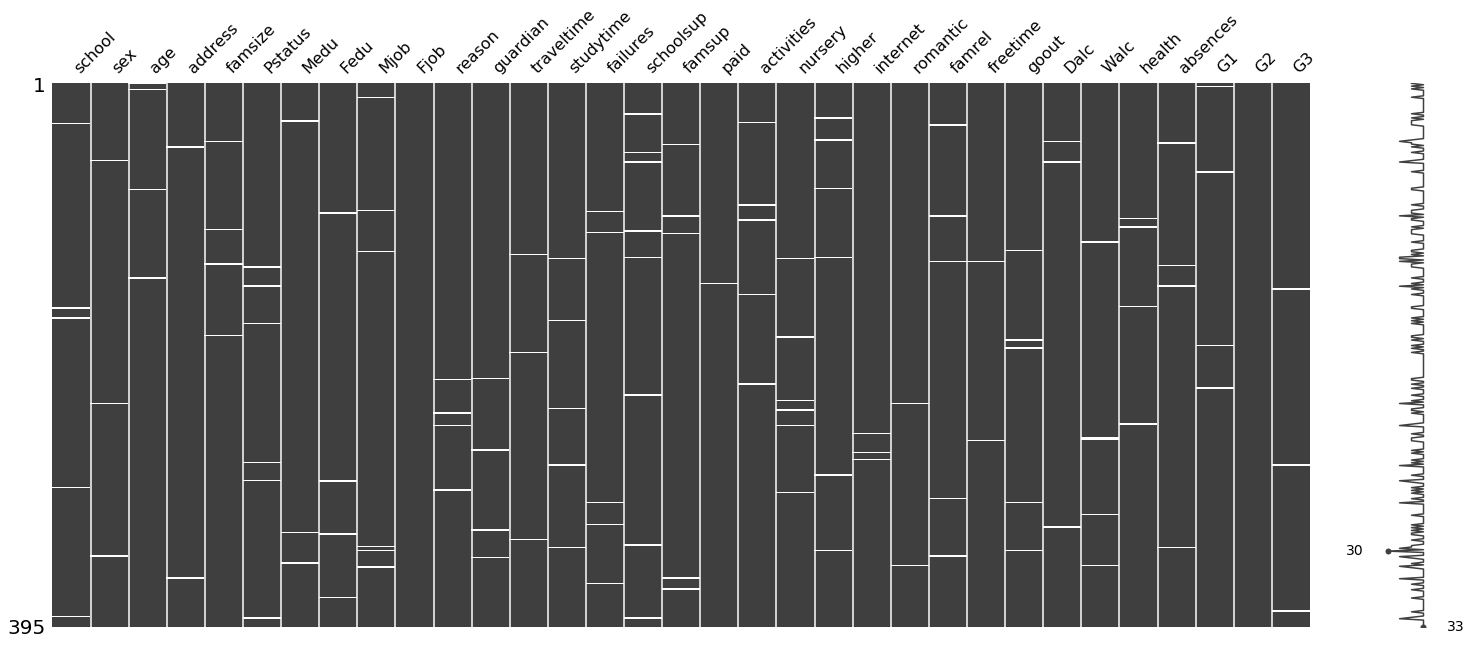

In [42]:
for colname, serie in df.iteritems():
    if serie.isna().value_counts('%')[False] == 1.0:
        print(colname, 0.0)
    else:
        print(colname, serie.isna().value_counts('%')[True].round(3))
        
plt.figure(figsize=(4,4))
msngo.matrix(df)

In [52]:
# recodificación de las variables
df['school'] = np.where(df['school'] == 'MS', 1, 0)
df['sex'] = np.where(df['sex'] == 'M', 1, 0)
df['address'] = np.where(df['address'] == 'R', 1, 0)
df['famsize'] = np.where(df['famsize'] == 'LE3', 1, 0)
df['Pstatus'] = np.where(df['Pstatus'] == 'A', 1, 0)
df['schoolsup'] = np.where(df['schoolsup'] == 'yes', 1, 0)
df['famsup'] = np.where(df['famsup'] == 'no', 1, 0)
df['paid'] = np.where(df['paid'] == 'yes', 1, 0)
df['activities'] = np.where(df['activities'] == 'no', 1, 0)

df['Mjob'] = np.where(df['Mjob'] == 'other', 0, df['Mjob'])
df['Mjob'] = np.where(df['Mjob'] == 'services', 1, df['Mjob'])
df['Mjob'] = np.where(df['Mjob'] == 'at_home', 2, df['Mjob'])
df['Mjob'] = np.where(df['Mjob'] == 'teacher', 3, df['Mjob'])
df['Mjob'] = np.where(df['Mjob'] == 'health', 4, df['Mjob'])

df['Fjob'] = np.where(df['Fjob'] == 'other', 0, df['Fjob'])
df['Fjob'] = np.where(df['Fjob'] == 'services', 1, df['Fjob'])
df['Fjob'] = np.where(df['Fjob'] == 'teacher', 2, df['Fjob'])
df['Fjob'] = np.where(df['Fjob'] == 'at_home', 3, df['Fjob'])
df['Fjob'] = np.where(df['Fjob'] == 'health', 4, df['Fjob'])

df['reason'] = np.where(df['reason'] == 'course', 0, df['reason'])
df['reason'] = np.where(df['reason'] == 'home', 1, df['reason'])
df['reason'] = np.where(df['reason'] == 'reputation', 2, df['reason'])
df['reason'] = np.where(df['reason'] == 'other', 3, df['reason'])

df['guardian'] = np.where(df['guardian'] == 'mother', 0, df['guardian'])
df['guardian'] = np.where(df['guardian'] == 'father', 1, df['guardian'])
df['guardian'] = np.where(df['guardian'] == 'other', 2, df['guardian'])